In [1]:
# Team 3 - NLP Project 3
# Authors:
# Anita Mutyala
# DeviKartik Illendula
# Ramidi SriDivya Reddy

import string
import re
from nltk.tokenize import sent_tokenize, word_tokenize 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
import re
import nltk
from nltk import ngrams
from nltk.util import ngrams
from nltk import FreqDist
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# reading the file and split the data at space
file = open("C:/Users/anith/OneDrive/Desktop/NLP/NLP/French_dataset.txt","r")
French_data=file.read()

def remove_whitespace(French_data): 
    return  " ".join(French_data.split()) 

In [3]:
#word tokenization
from nltk.tokenize import word_tokenize
tokens = word_tokenize(French_data)
print("# of words after word tokenizing: ", len(tokens))
print(tokens[:50])

# of words after word tokenizing:  939417
['new', 'jersey', 'est', 'parfois', 'calme', 'pendant', 'l', "'", 'automne', ',', 'et', 'il', 'est', 'neigeux', 'en', 'avril', '.', 'les', 'Ã©tats-unis', 'est', 'gÃ©nÃ©ralement', 'froid', 'en', 'juillet', ',', 'et', 'il', 'gÃ¨le', 'habituellement', 'en', 'novembre', '.', 'california', 'est', 'gÃ©nÃ©ralement', 'calme', 'en', 'mars', ',', 'et', 'il', 'est', 'gÃ©nÃ©ralement', 'chaud', 'en', 'juin', '.', 'les', 'Ã©tats-unis', 'est']


In [4]:
# removing punctuations 
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
regexp_tokens = tokenizer.tokenize(French_data.lower()) 
print("# of words after word tokenizing with removing punctuation: ", len(regexp_tokens))
print(regexp_tokens[0:50])

# of words after word tokenizing with removing punctuation:  896392
['new', 'jersey', 'est', 'parfois', 'calme', 'pendant', 'l', 'automne', 'et', 'il', 'est', 'neigeux', 'en', 'avril', 'les', 'ã', 'tats', 'unis', 'est', 'gã', 'nã', 'ralement', 'froid', 'en', 'juillet', 'et', 'il', 'gã', 'le', 'habituellement', 'en', 'novembre', 'california', 'est', 'gã', 'nã', 'ralement', 'calme', 'en', 'mars', 'et', 'il', 'est', 'gã', 'nã', 'ralement', 'chaud', 'en', 'juin', 'les']


In [5]:
# using the wordNetLemmatizer and Porterstemmer find the stenned words
from nltk.stem import PorterStemmer, WordNetLemmatizer
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()
stemmed_words=[stemmer.stem(tok) for tok in regexp_tokens]
print("stemmed words:", stemmed_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<FreqDist with 283 samples and 896392 outcomes>
[('est', 91519), ('en', 49190), ('le', 48509), ('il', 40845), ('mai', 33942), ('et', 27913), ('la', 23036), ('l', 19449), ('parfoi', 17703), ('jamai', 17263), ('ã', 16840), ('gã', 16361), ('fã', 15535), ('nã', 14629), ('ralement', 14629), ('moin', 12739), ('fruit', 12548), ('au', 12129), ('aimã', 12038), ('prã', 11697)]


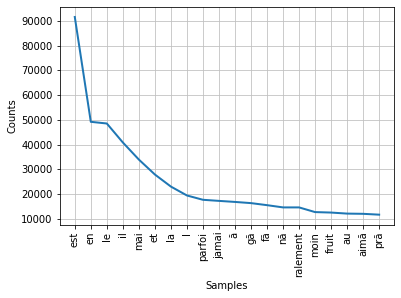

In [6]:
# finding the frequency of the words for the stemmed words
word_freq = nltk.FreqDist(stemmed_words)
print(word_freq)
k = 20
print(word_freq.most_common(k))
word_freq.plot(k)

In [7]:
# writing a function for the most common frequency words
def word_frequency(n_grams, k):
    word_freq = FreqDist(n_grams)
    print(word_freq)
    print(word_freq.most_common(k))
    return word_freq

In [8]:
def generate_ngrams(French_data, n):
    n_grams = ngrams(nltk.word_tokenize(French_data.lower()),n)
    return [' '.join(grams) for grams in n_grams]

In [9]:
n = 1
k=15
n_grams = generate_ngrams(French_data, n)
word_freq=word_frequency(n_grams, k)
print(word_freq)

<FreqDist with 347 samples and 939417 outcomes>
[('est', 91484), ('.', 63762), (',', 57265), ('en', 49190), ('il', 39146), ('les', 30497), ('mais', 29717), ('et', 27913), ('la', 23036), ("'", 17804), ('parfois', 17703), ('jamais', 17263), ('le', 16312), ('l', 15410), ('gã©nã©ralement', 14629)]
<FreqDist with 347 samples and 939417 outcomes>


In [10]:
n = 2
k=15
n_gram2 = generate_ngrams(French_data, n)
word_freq1=word_frequency(n_gram2, k)
print(word_freq1)

<FreqDist with 2033 samples and 939416 outcomes>
[('il est', 31663), (', mais', 29717), (', et', 18195), ('et il', 17383), ('est parfois', 17031), ('mais il', 16830), ("l '", 15410), ('est jamais', 14815), ('est gã©nã©ralement', 14587), ('. la', 9510), ('et les', 8768), (', les', 7608), ('est la', 7197), ('au mois', 6785), ('fruit prã©fã©rã©', 6307)]
<FreqDist with 2033 samples and 939416 outcomes>


In [11]:
n = 3
k=15
n_gram3 = generate_ngrams(French_data, n)
word_freq=word_frequency(n_gram3, k)
print(word_freq)

<FreqDist with 8655 samples and 939415 outcomes>
[(', et il', 17380), (', mais il', 16830), ('et il est', 15896), ('mais il est', 15620), ('il est parfois', 8607), ('il est gã©nã©ralement', 7318), ('il est jamais', 6730), ("l ' automne", 5981), ('. les ã©tats-unis', 5010), ("l ' inde", 4998), ('. new jersey', 4981), ("pendant l '", 4974), ('. paris est', 4940), ("' inde est", 4906), (". l '", 4894)]
<FreqDist with 8655 samples and 939415 outcomes>


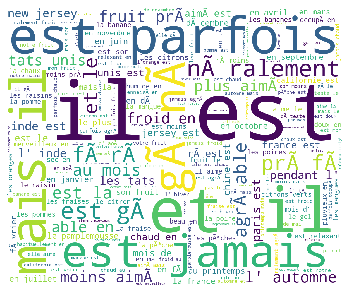

In [12]:
# wordcloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency
wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = 'white',
                            width = 1200,
                            height = 1000).generate(French_data)
plt.figure(figsize = (6, 6), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()